<a href="https://colab.research.google.com/github/Anlu-Chen/Digit_recognizer/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import tensorflow as tf
print(tf.__version__)
import time as time
import math as math
from tensorflow.keras.callbacks import LearningRateScheduler
import pandas as pd

2.4.1


In [144]:
data = np.loadtxt('/content/drive/MyDrive/mnist clasif_numeros/train.csv',delimiter=',',skiprows=1)
print(data.shape)

(42000, 785)


In [145]:
data_images = data[0:42000, 1:785]
data_number = data[0:42000, 0]
print(data_images.shape, data_number.shape)

numeros = list(range(0,42000))
rand.shuffle(numeros)
#print(numeros)
print(type(numeros))
print(len(numeros)-len(set(numeros)))  #para comprobar si se ha repetido algun numero, si sale 0, no se ha repetido
numeros_random = np.array(numeros) #pasar la lista a vector
#print(numeros_random)

(42000, 784) (42000,)
<class 'list'>
0


(40000, 784) (40000,) (2000, 784) (2000,)


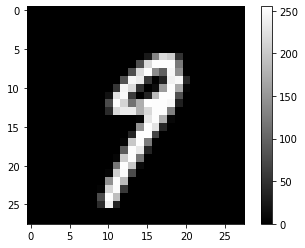

9.0


In [146]:
train_data= data_images[numeros_random[0:40000],:]
train_number= data_number[numeros_random[0:40000]]
test_data= data_images[numeros_random[40000:42000],:]
test_number=data_number[numeros_random[40000:42000]]
print(train_data.shape,
      train_number.shape,
      test_data.shape,
      test_number.shape)
example = np.reshape(train_data,(40000,28,28))
plt.imshow(np.asarray(example[12]),cmap='gray')
plt.colorbar()
plt.show()
print(train_number[12])

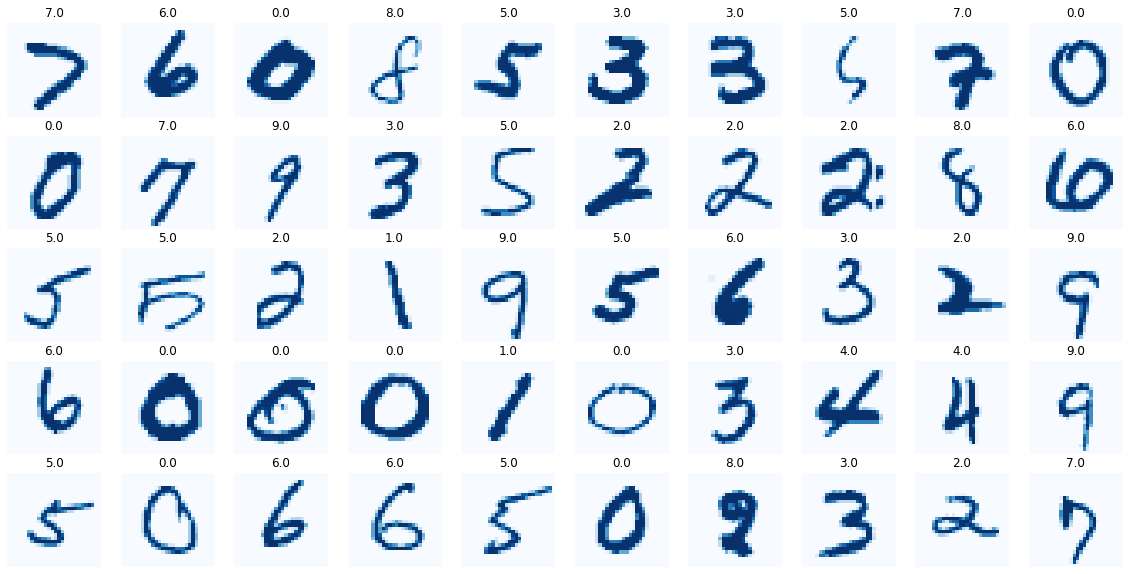

In [147]:
rows = 5
cols = 10

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(train_data[i].reshape([28,28]),cmap="Blues")
    plt.axis("off")
    plt.title(str(train_number[i]))

In [148]:
train_images0 = np.reshape(train_data,(40000,28,28,1))
train_images = train_images0/255.0
test_images0 = np.reshape(test_data,(2000,28,28,1))
test_images = test_images0/255.0

Epoch 1/12

Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
800/800 [==============================] - 4s 5ms/step - loss: 0.5888 - accuracy: 0.8053 - val_loss: 0.1174 - val_accuracy: 0.9650
Epoch 2/12

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00951229424500714.
800/800 [==============================] - 4s 5ms/step - loss: 0.0646 - accuracy: 0.9818 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 3/12

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009048374180359595.
800/800 [==============================] - 4s 5ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0400 - val_accuracy: 0.9900
Epoch 4/12

Epoch 00004: LearningRateScheduler reducing learning rate to 0.008607079764250578.
800/800 [==============================] - 4s 5ms/step - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.0508 - val_accuracy: 0.9865
Epoch 5/12

Epoch 00005: LearningRateScheduler reducing learning rate to 0.008187307530779819.
800/800 [=========

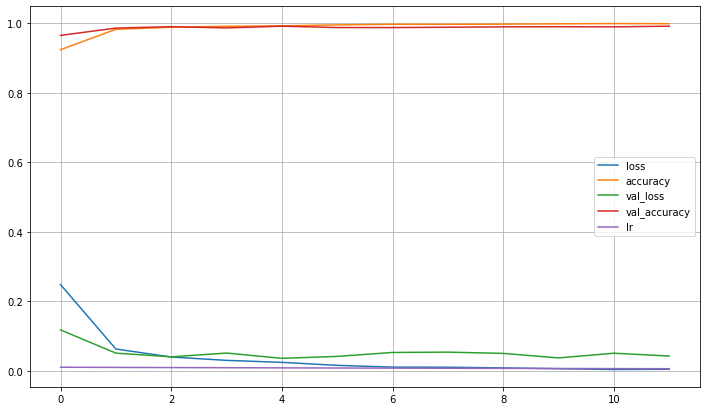

0.7557865897814433 
 minutos ha durado


In [158]:
# Entrenamiento de red CNN.
tic=time.time()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(5,5),padding = 'same', input_shape=train_images[0].shape),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, kernel_size=(5,5), padding = 'same' ),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),  
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding = 'same' ),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),  
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, kernel_size=(2,2),padding = 'same'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),  
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(2048,kernel_initializer='random_normal',bias_initializer='zeros', use_bias=True), 
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1024, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(512, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(256, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(10, activation='softmax', use_bias=True)])
############################################################################
# Compilamos el modelo
# Definimos como va a ser el ratio de aprendizaje exponencial.

opt=tf.keras.optimizers.SGD(momentum=0.95, nesterov=True, name='SGD')
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) 

initial_learning_rate = 0.01
def lr_exp_decay(epoch, learning_rate):
    k = 0.05
    return initial_learning_rate * math.exp(-k*epoch)

# Ajustamos el modelo.
training_history = model.fit(
        train_images, 
        train_number, 
        batch_size=50,
        epochs=12, 
        validation_data=(test_images, test_number),
        callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)])
        

############################################################################
# Pintamos el modelo
model.summary() 
pd.DataFrame(training_history.history).plot(figsize=(12,7))
plt.grid(True)
plt.show()

toc=time.time()
print((toc-tic)/60,'\n minutos ha durado')

In [159]:
test = np.loadtxt('/content/drive/MyDrive/mnist clasif_numeros/test.csv', delimiter=',',skiprows=1)
print(test.shape)

(28000, 784)


In [160]:
#test_images = test[0:28000, 0:784]
test_images = np.reshape(test,(28000,28,28,1))
print(test_images.shape)

(28000, 28, 28, 1)


In [161]:
val_p = np.argmax(model.predict(test_images),axis =1)
print(val_p.shape)
#predictions = model.predict(test_images)
#print(predictions.shape)

(28000,)


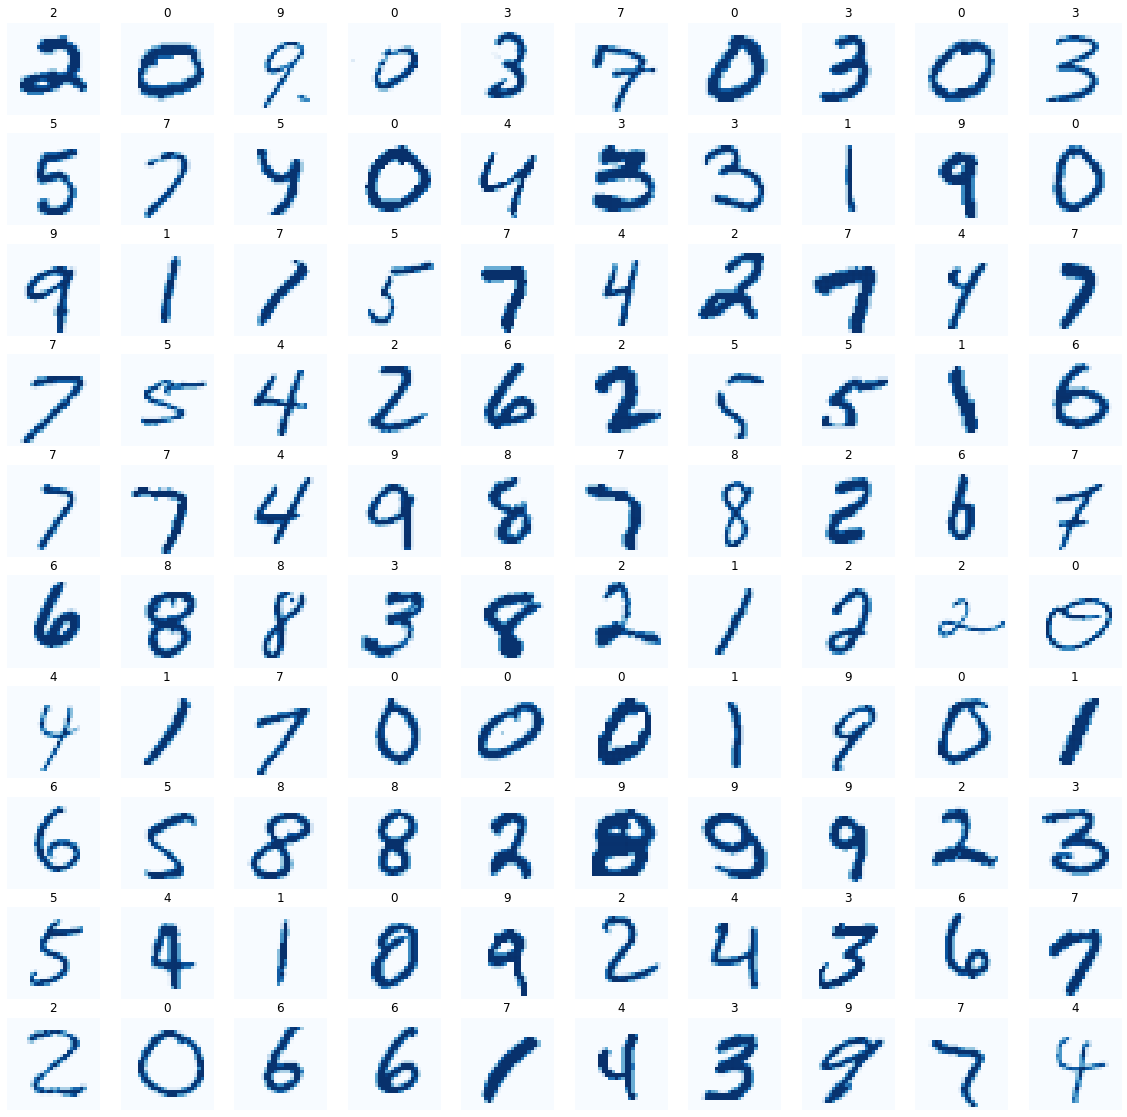

In [162]:
rows = 10
cols = 10

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(test_images[i].reshape([28,28]),cmap="Blues")
    plt.axis("off")
    plt.title(str(val_p[i]))

In [164]:
submission = (np.zeros((28000,2)))
for i in range (0,28000):
        submission[i,0] = int(i+1)
        #number_predict = np.where(predictions[i,:] == max(predictions[i,:]))  #cuidado con el formato resultante
        #number_predict = number_predict [0] #para adecuar el formato.
        submission[i,1] = int(val_p[i])

submission = submission.astype(int)
print(submission[0:30])

np.savetxt('submission.csv', submission.astype(int), fmt='%i', delimiter=",")

[[ 1  2]
 [ 2  0]
 [ 3  9]
 [ 4  0]
 [ 5  3]
 [ 6  7]
 [ 7  0]
 [ 8  3]
 [ 9  0]
 [10  3]
 [11  5]
 [12  7]
 [13  5]
 [14  0]
 [15  4]
 [16  3]
 [17  3]
 [18  1]
 [19  9]
 [20  0]
 [21  9]
 [22  1]
 [23  7]
 [24  5]
 [25  7]
 [26  4]
 [27  2]
 [28  7]
 [29  4]
 [30  7]]
